In [1]:
import pandas as pd

# Load the dataset
# file_path = '/mnt/data/Affordable_Housing_by_Town_2011-2022.csv'
data = pd.read_csv("Affordable_Housing_by_Town_2011-2022.csv")

# Display the first few rows of the dataset to understand its structure
data.head()


,Year,Town Code,Town,2010 Census Units,Government Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable
0,2020,1,Andover,1317,18.0,1,32,0,51,3.87
1,2020,2,Ansonia,8148,349.0,764,147,0,1260,15.46
2,2020,3,Ashford,1903,32.0,0,36,0,68,3.57
3,2020,4,Avon,7389,244.0,16,44,0,304,4.11
4,2020,5,Barkhamsted,1589,0.0,6,23,0,29,1.83


In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

print(missing_values, data_types)


Year                                   0
Town Code                              0
Town                                   0
2010 Census Units                      0
Government Assisted                    1
Tenant Rental Assistance               0
 Single Family CHFA/ USDA Mortgages    0
Deed Restricted Units                  0
Total Assisted Units                   0
Percent Affordable                     0
dtype: int64 Year                                     int64
Town Code                                int64
Town                                    object
2010 Census Units                        int64
Government Assisted                    float64
Tenant Rental Assistance                 int64
 Single Family CHFA/ USDA Mortgages      int64
Deed Restricted Units                    int64
Total Assisted Units                     int64
Percent Affordable                     float64
dtype: object


In [5]:
# Fill the missing value in 'Government Assisted' with the median
median_gov_assisted = data['Government Assisted'].median()
data['Government Assisted'].fillna(median_gov_assisted, inplace=True)

# Verify there are no more missing values
missing_values_after = data.isnull().sum()

# Summary statistics for a descriptive overview
summary_statistics = data.describe()

missing_values_after, summary_statistics


(Year                                   0
 Town Code                              0
 Town                                   0
 2010 Census Units                      0
 Government Assisted                    0
 Tenant Rental Assistance               0
  Single Family CHFA/ USDA Mortgages    0
 Deed Restricted Units                  0
 Total Assisted Units                   0
 Percent Affordable                     0
 dtype: int64,
               Year    Town Code  2010 Census Units  Government Assisted  \
 count  2025.000000  2025.000000        2025.000000          2025.000000   
 mean   2016.502222    84.921481        8802.104691           537.378765   
 std       3.454979    48.838316       10447.314222          1339.480238   
 min    2011.000000     1.000000         388.000000             0.000000   
 25%    2013.000000    43.000000        2306.000000            24.000000   
 50%    2017.000000    85.000000        5451.000000           137.000000   
 75%    2020.000000   127.000000 

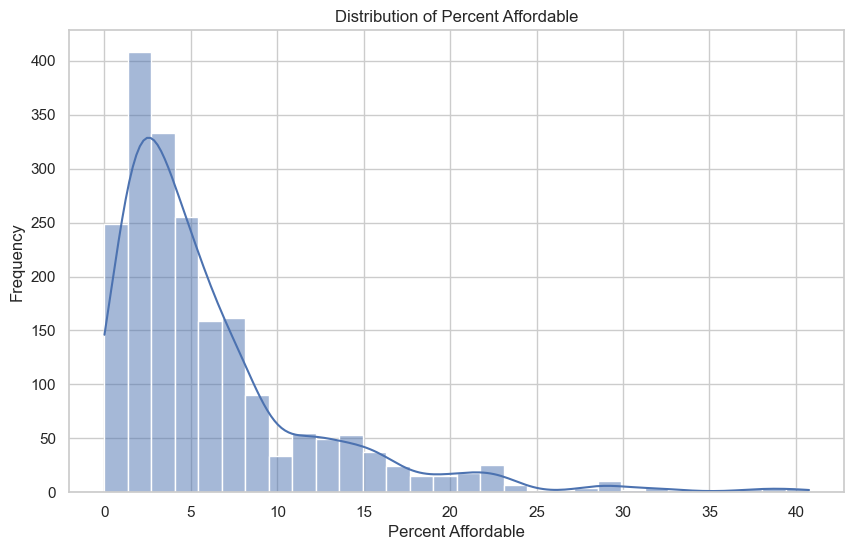

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Histogram for Percent Affordable
plt.figure(figsize=(10, 6))
sns.histplot(data['Percent Affordable'], bins=30, kde=True)
plt.title('Distribution of Percent Affordable')
plt.xlabel('Percent Affordable')
plt.ylabel('Frequency')
plt.show()


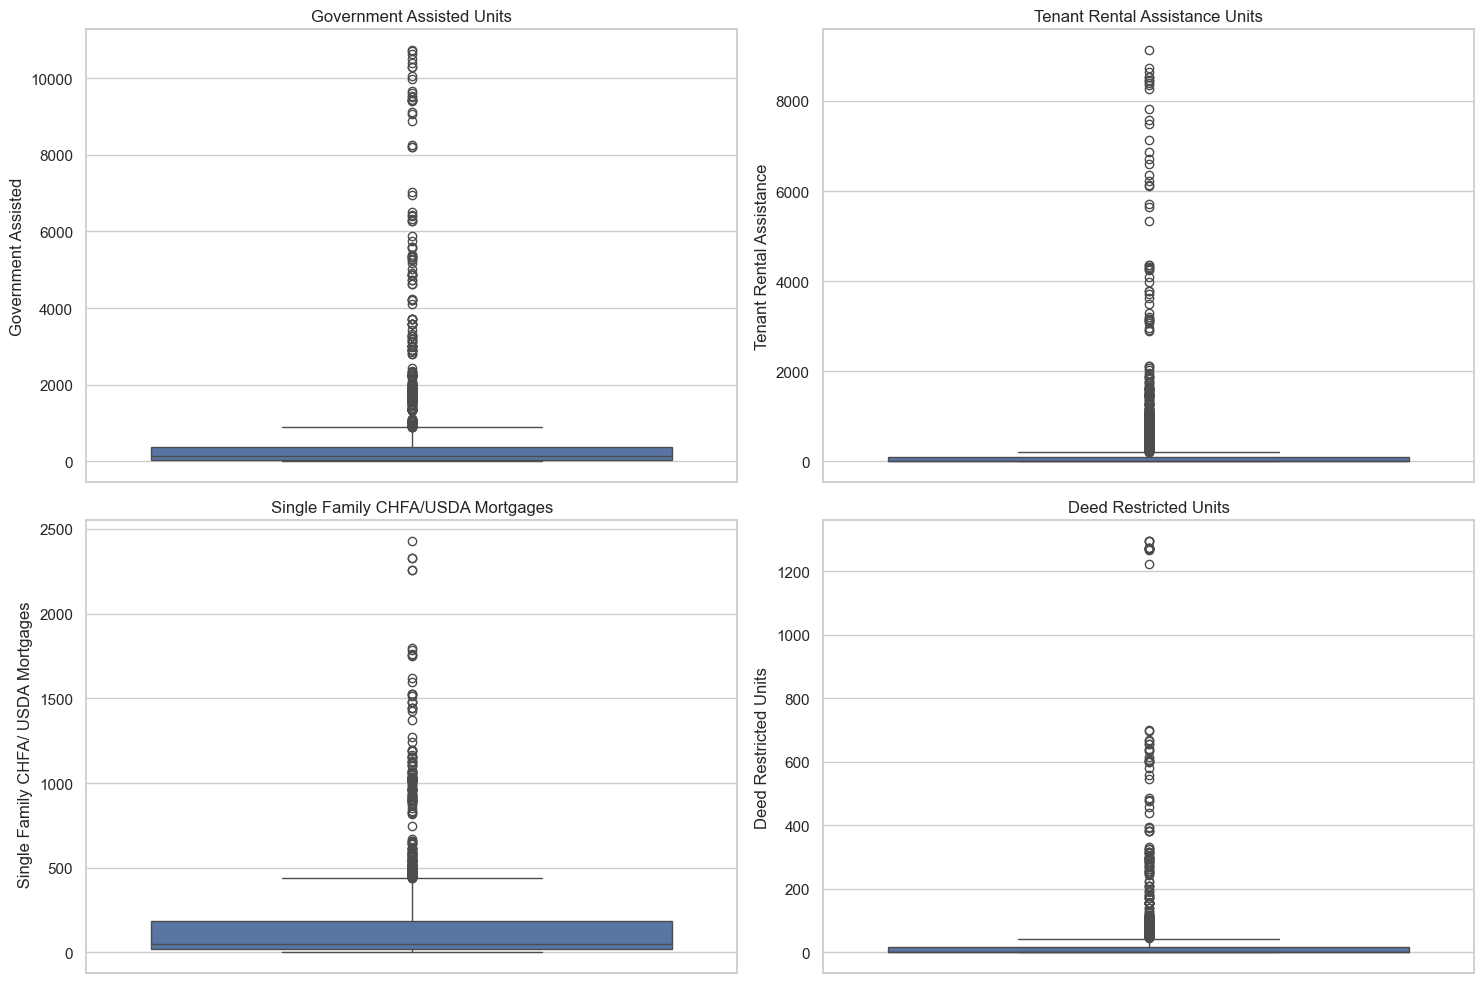

In [7]:
# Boxplots for Government Assisted, Tenant Rental Assistance, Single Family CHFA/USDA Mortgages, and Deed Restricted Units
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data['Government Assisted'])
plt.title('Government Assisted Units')

plt.subplot(2, 2, 2)
sns.boxplot(data['Tenant Rental Assistance'])
plt.title('Tenant Rental Assistance Units')

plt.subplot(2, 2, 3)
sns.boxplot(data[' Single Family CHFA/ USDA Mortgages'])
plt.title('Single Family CHFA/USDA Mortgages')

plt.subplot(2, 2, 4)
sns.boxplot(data['Deed Restricted Units'])
plt.title('Deed Restricted Units')

plt.tight_layout()
plt.show()


In [ ]:
# Group the data by year and calculate the mean for relevant columns
yearly_data = data.groupby('Year').mean().reset_index()

# Set plot style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Total Assisted Units
ax1.plot(yearly_data['Year'], yearly_data['Total Assisted Units'], color='b', marker='o', label='Total Assisted Units')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Assisted Units', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot Percent Affordable
ax2 = ax1.twinx()
ax2.plot(yearly_data['Year'], yearly_data['Percent Affordable'], color='r', marker='s', label='Percent Affordable')
ax2.set_ylabel('Percent Affordable', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add titles and legends
plt.title('Yearly Trend Analysis: Total Assisted Units and Percent Affordable')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10796\2611196702.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percent Affordable', y='Town', data=top_10_affordable, palette='viridis')


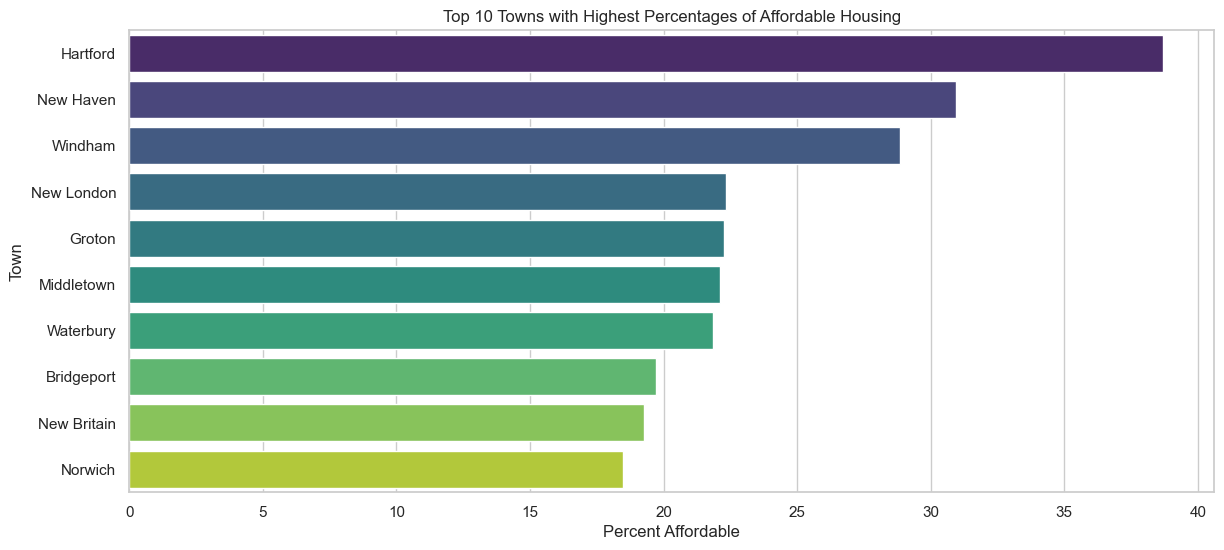

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10796\2611196702.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percent Affordable', y='Town', data=bottom_10_affordable, palette='viridis')


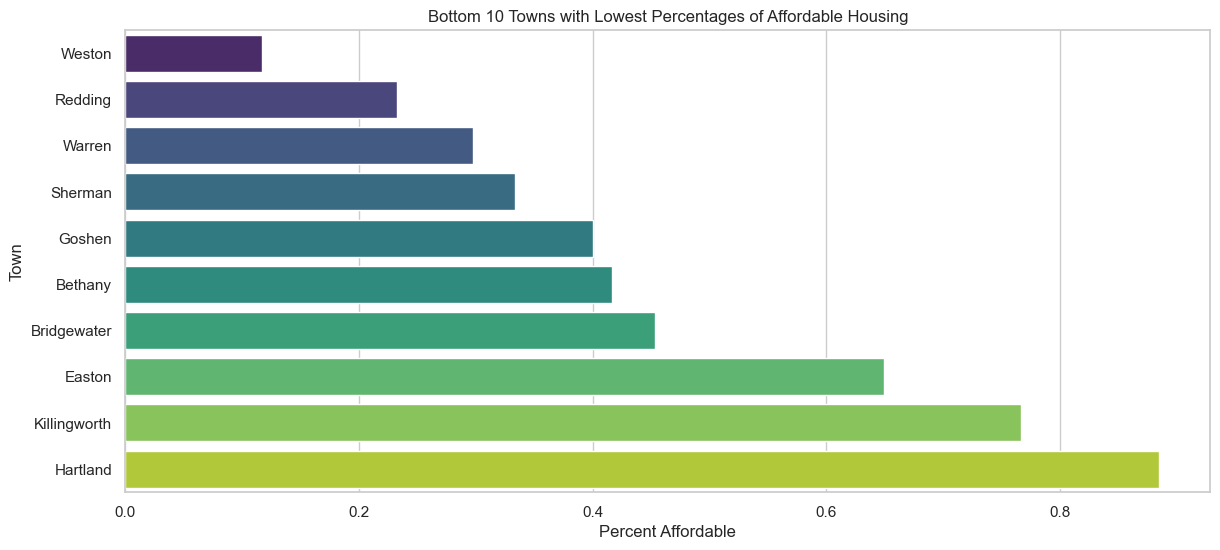

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 towns with the highest and lowest percentages of affordable housing
top_10_affordable = data.groupby('Town')['Percent Affordable'].mean().nlargest(10).reset_index()
bottom_10_affordable = data.groupby('Town')['Percent Affordable'].mean().nsmallest(10).reset_index()

# Set plot style
sns.set(style="whitegrid")

# Plot top 10 towns with the highest percentages of affordable housing
plt.figure(figsize=(14, 6))
sns.barplot(x='Percent Affordable', y='Town', data=top_10_affordable, palette='viridis')
plt.title('Top 10 Towns with Highest Percentages of Affordable Housing')
plt.xlabel('Percent Affordable')
plt.ylabel('Town')
plt.show()

# Plot bottom 10 towns with the lowest percentages of affordable housing
plt.figure(figsize=(14, 6))
sns.barplot(x='Percent Affordable', y='Town', data=bottom_10_affordable, palette='viridis')
plt.title('Bottom 10 Towns with Lowest Percentages of Affordable Housing')
plt.xlabel('Percent Affordable')
plt.ylabel('Town')
plt.show()


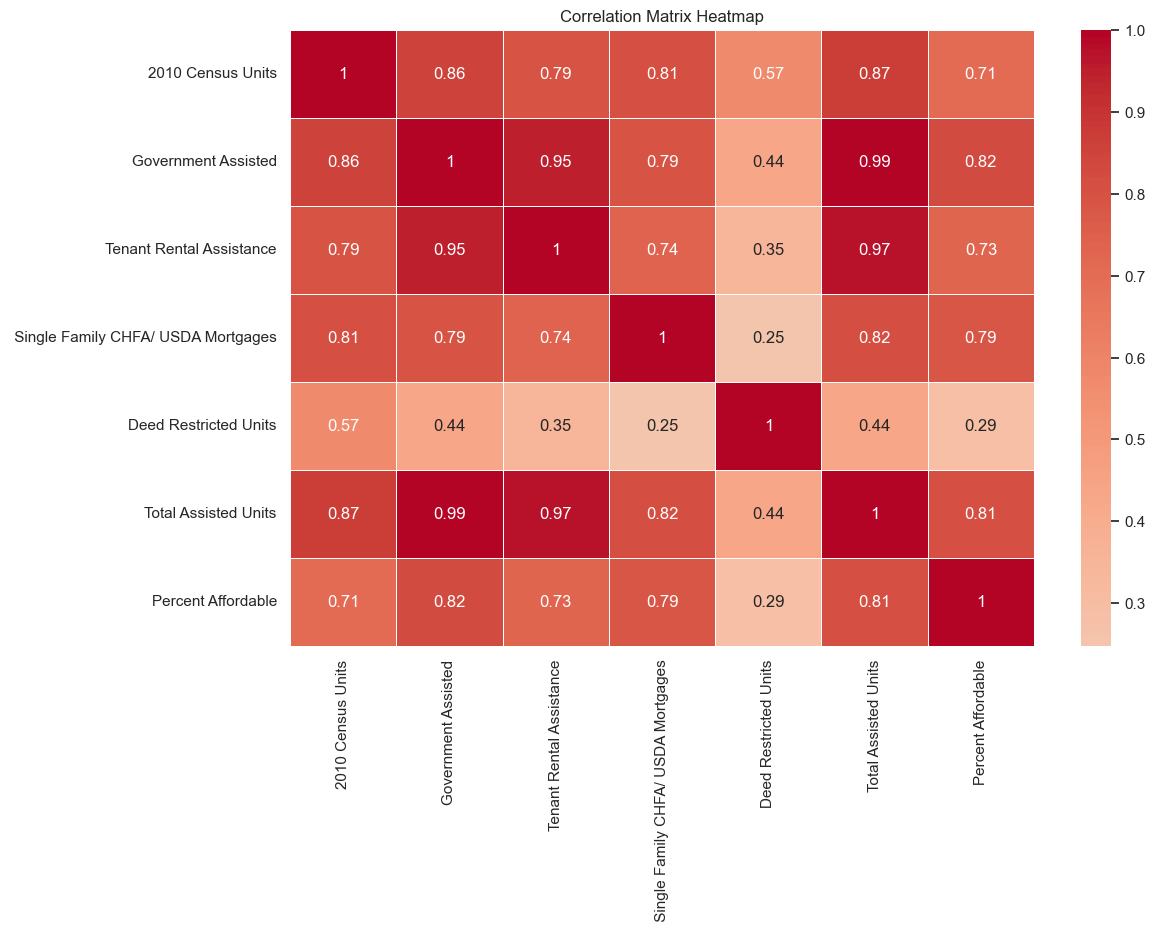

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns
numerical_columns = ['2010 Census Units', 'Government Assisted', 'Tenant Rental Assistance', 
                     ' Single Family CHFA/ USDA Mortgages', 'Deed Restricted Units', 
                     'Total Assisted Units', 'Percent Affordable']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Set plot style
sns.set(style="whitegrid")

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


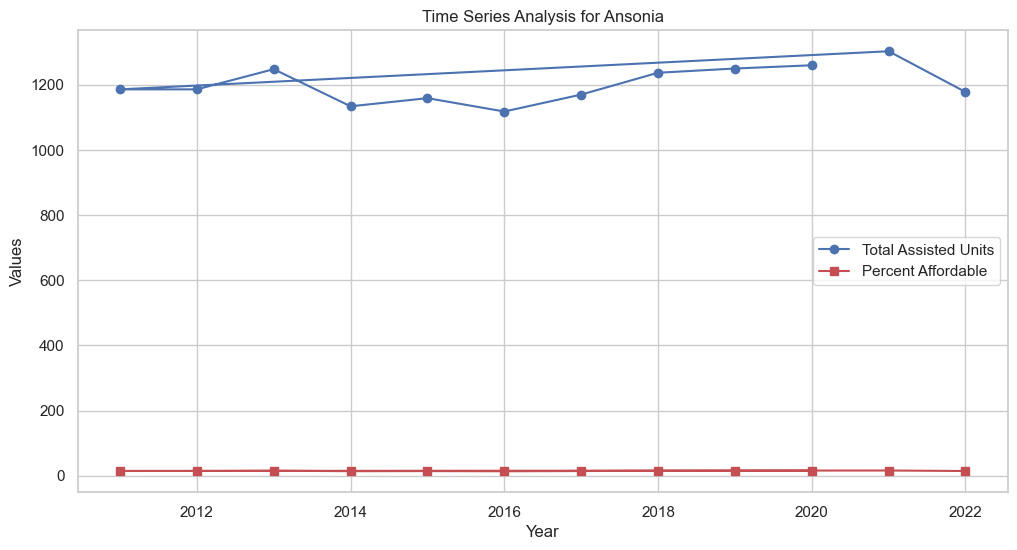

In [11]:
# Plot time series for a specific town
town_name = 'Ansonia'
town_data = data[data['Town'] == town_name]

plt.figure(figsize=(12, 6))
plt.plot(town_data['Year'], town_data['Total Assisted Units'], marker='o', label='Total Assisted Units')
plt.plot(town_data['Year'], town_data['Percent Affordable'], marker='s', label='Percent Affordable', color='r')
plt.title(f'Time Series Analysis for {town_name}')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()


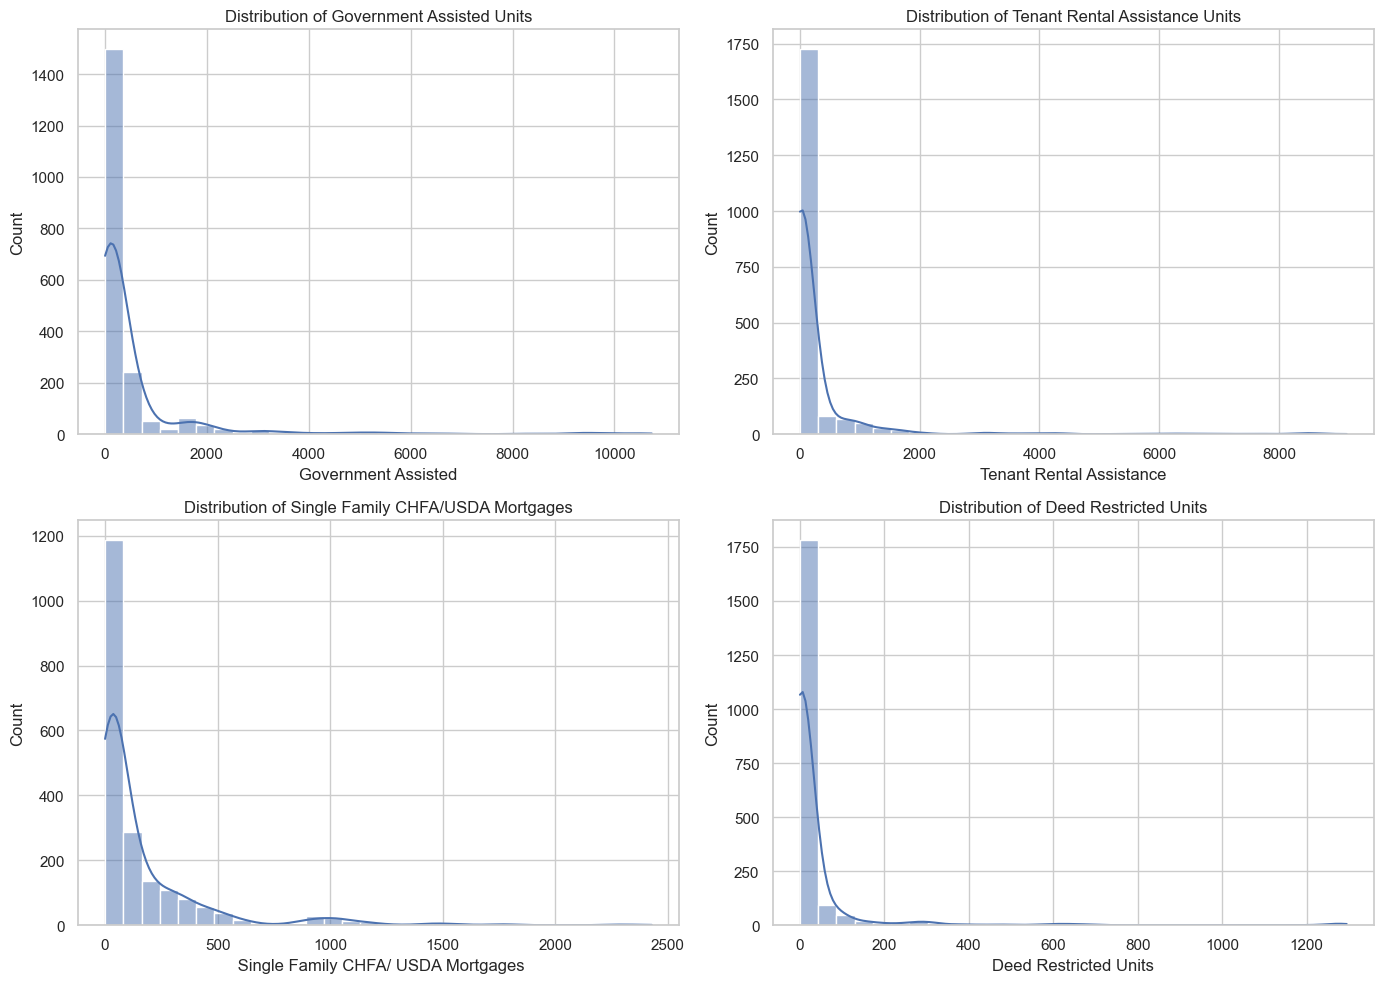

In [14]:
# Plot distributions for various housing assistance types
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Government Assisted'], bins=30, kde=True)
plt.title('Distribution of Government Assisted Units')

plt.subplot(2, 2, 2)
sns.histplot(data['Tenant Rental Assistance'], bins=30, kde=True)
plt.title('Distribution of Tenant Rental Assistance Units')

plt.subplot(2, 2, 3)
sns.histplot(data[' Single Family CHFA/ USDA Mortgages'], bins=30, kde=True)
plt.title('Distribution of Single Family CHFA/USDA Mortgages')

plt.subplot(2, 2, 4)
sns.histplot(data['Deed Restricted Units'], bins=30, kde=True)
plt.title('Distribution of Deed Restricted Units')

plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

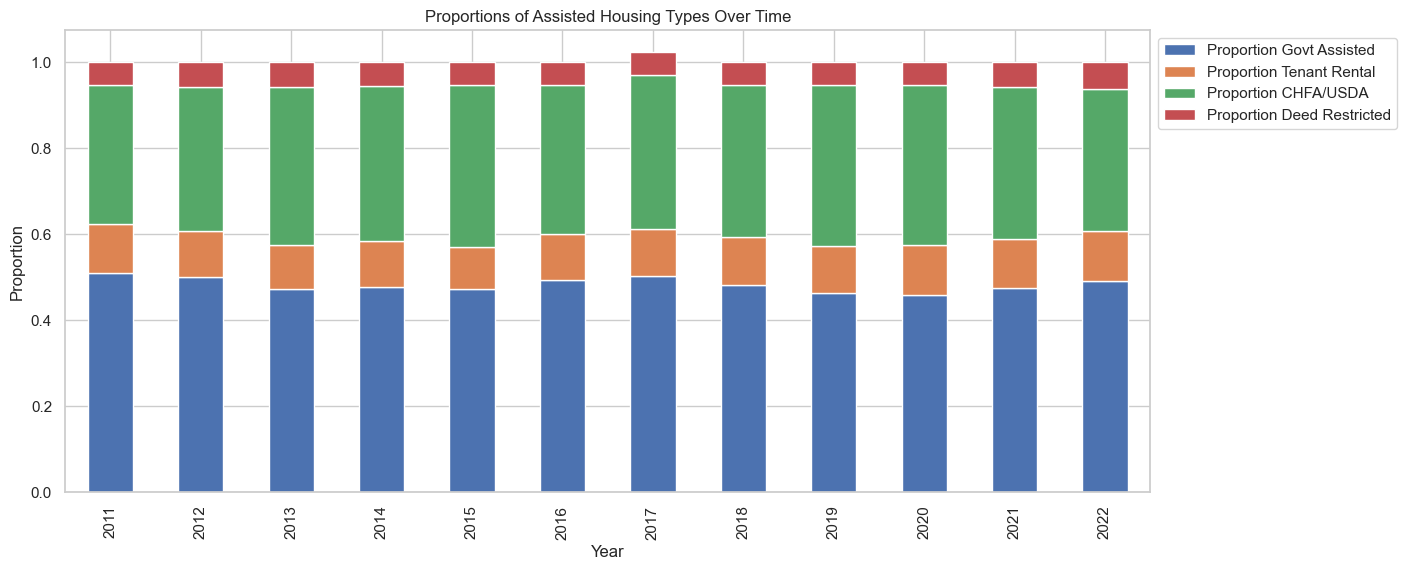

In [23]:
# Calculate proportions for each type of assisted housing
data['Proportion Govt Assisted'] = data['Government Assisted'] / data['Total Assisted Units']
data['Proportion Tenant Rental'] = data['Tenant Rental Assistance'] / data['Total Assisted Units']
data['Proportion CHFA/USDA'] = data[' Single Family CHFA/ USDA Mortgages'] / data['Total Assisted Units']
data['Proportion Deed Restricted'] = data['Deed Restricted Units'] / data['Total Assisted Units']

# Plot proportions
plt.figure(figsize=(14, 6))
data.groupby('Year')[['Proportion Govt Assisted', 'Proportion Tenant Rental', 'Proportion CHFA/USDA', 'Proportion Deed Restricted']].mean().plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Proportions of Assisted Housing Types Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


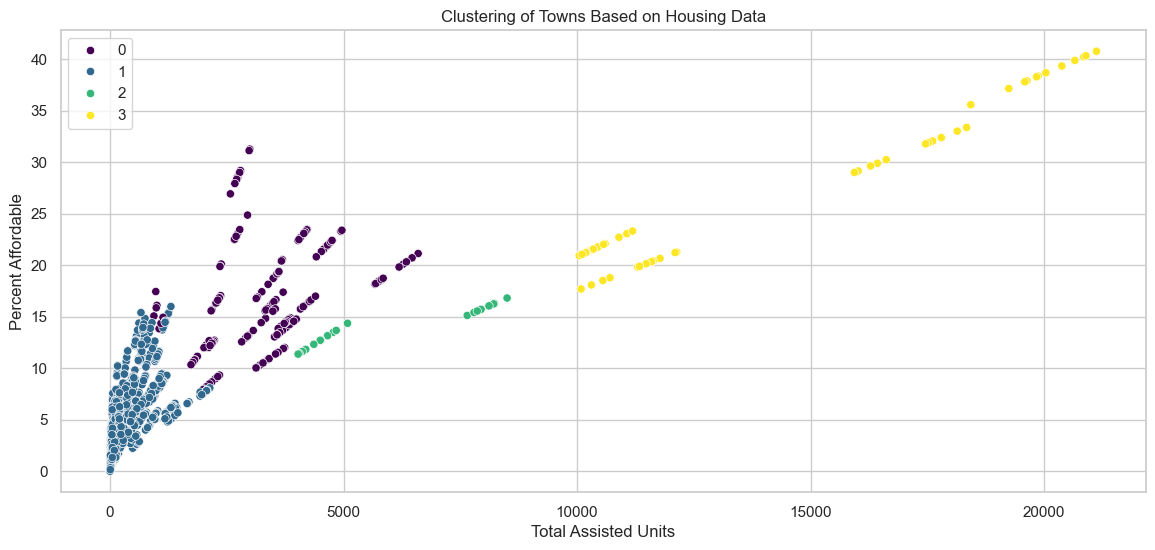

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns and standardize data
features = data[['Government Assisted', 'Tenant Rental Assistance', ' Single Family CHFA/ USDA Mortgages', 'Deed Restricted Units', 'Total Assisted Units', 'Percent Affordable']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Total Assisted Units', y='Percent Affordable', hue='Cluster', data=data, palette='viridis')
plt.title('Clustering of Towns Based on Housing Data')
plt.xlabel('Total Assisted Units')
plt.ylabel('Percent Affordable')
plt.legend()
plt.show()


Mean Squared Error: 9.68961998049827


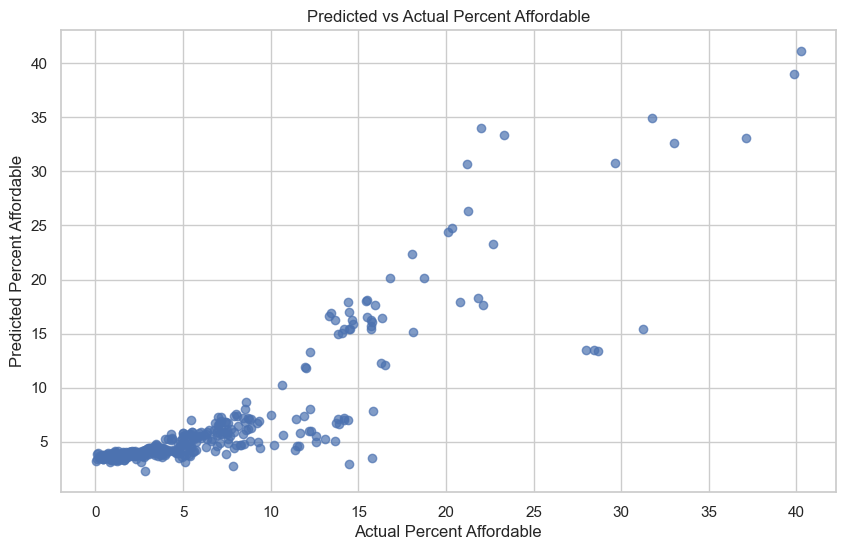

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for predictive modeling
X = data[['Year', '2010 Census Units', 'Government Assisted', 'Tenant Rental Assistance', ' Single Family CHFA/ USDA Mortgages', 'Deed Restricted Units']]
y = data['Percent Affordable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Predicted vs Actual Percent Affordable')
plt.xlabel('Actual Percent Affordable')
plt.ylabel('Predicted Percent Affordable')
plt.show()
